In [2]:
import pandas as pd
df=pd.read_csv('Crop_recommendationV2.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label,soil_moisture,soil_type,...,organic_matter,irrigation_frequency,crop_density,pest_pressure,fertilizer_usage,growth_stage,urban_area_proximity,water_source_type,frost_risk,water_usage_efficiency
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,29.446064,2,...,3.121395,4,11.743910,57.607308,188.194958,1,2.719614,3,95.649985,1.193293
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,12.851183,3,...,2.142021,4,16.797101,74.736879,70.963629,1,4.714427,2,77.265694,1.752672
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,29.363913,2,...,1.474974,1,12.654395,1.034478,191.976077,1,30.431736,2,18.192168,3.035541
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,26.207732,3,...,8.393907,1,10.864360,24.091888,55.761388,3,10.861071,3,82.818720,1.273341
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,28.236236,2,...,5.202285,3,13.852910,38.811481,185.259702,2,47.190777,3,25.466499,2.578671


# 🧪 2. Statistical / Machine Learning Methods

# 🔍 A. Random Forest Feature Importance (Supervised ML)

In [3]:
from sklearn.ensemble import RandomForestClassifier

# Assuming df is your DataFrame
X = df.drop(columns=['label'])  # all features
y = df['label']  # crop type

model = RandomForestClassifier()
model.fit(X, y)

importances = model.feature_importances_
feature_importance = pd.Series(importances, index=X.columns).sort_values(ascending=False)
print(feature_importance)


rainfall                  0.188200
humidity                  0.182404
K                         0.152758
P                         0.139553
N                         0.098114
temperature               0.079987
ph                        0.059807
water_usage_efficiency    0.008744
wind_speed                0.008462
pest_pressure             0.008443
co2_concentration         0.008183
frost_risk                0.008119
fertilizer_usage          0.008041
soil_moisture             0.007988
organic_matter            0.007943
sunlight_exposure         0.007848
crop_density              0.007748
urban_area_proximity      0.007672
irrigation_frequency      0.003397
growth_stage              0.002735
water_source_type         0.001931
soil_type                 0.001924
dtype: float64


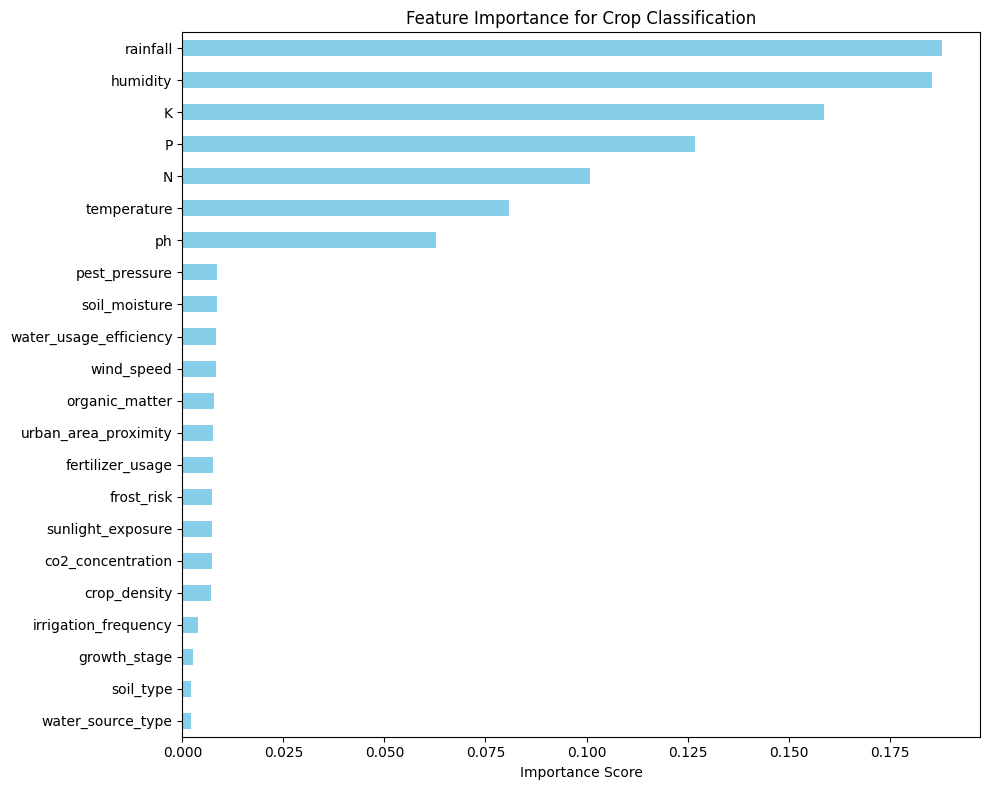

In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

le = LabelEncoder()
df['label_enc'] = le.fit_transform(df['label'])  # new numeric label column

X = df.drop(columns=['label', 'label_enc'])  # all input features
y = df['label_enc']  # encoded crop label



model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

importances = model.feature_importances_
feature_importance = pd.Series(importances, index=X.columns).sort_values(ascending=True)

# Plot
plt.figure(figsize=(10, 8))
feature_importance.plot(kind='barh', color='skyblue')
plt.title('Feature Importance for Crop Classification')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()


# 📊 B. Permutation Importance (Model-Agnostic)

In [5]:
from sklearn.inspection import permutation_importance

result = permutation_importance(model, X, y, n_repeats=10, random_state=42)
perm_importance = pd.Series(result.importances_mean, index=X.columns).sort_values(ascending=False)
print(perm_importance)


humidity                  0.160591
rainfall                  0.096727
K                         0.095273
N                         0.058955
P                         0.040818
ph                        0.005682
temperature               0.003636
soil_moisture             0.000000
soil_type                 0.000000
sunlight_exposure         0.000000
wind_speed                0.000000
co2_concentration         0.000000
organic_matter            0.000000
irrigation_frequency      0.000000
crop_density              0.000000
pest_pressure             0.000000
fertilizer_usage          0.000000
growth_stage              0.000000
urban_area_proximity      0.000000
water_source_type         0.000000
frost_risk                0.000000
water_usage_efficiency    0.000000
dtype: float64


 # C. SHAP Values (Explainable AI)

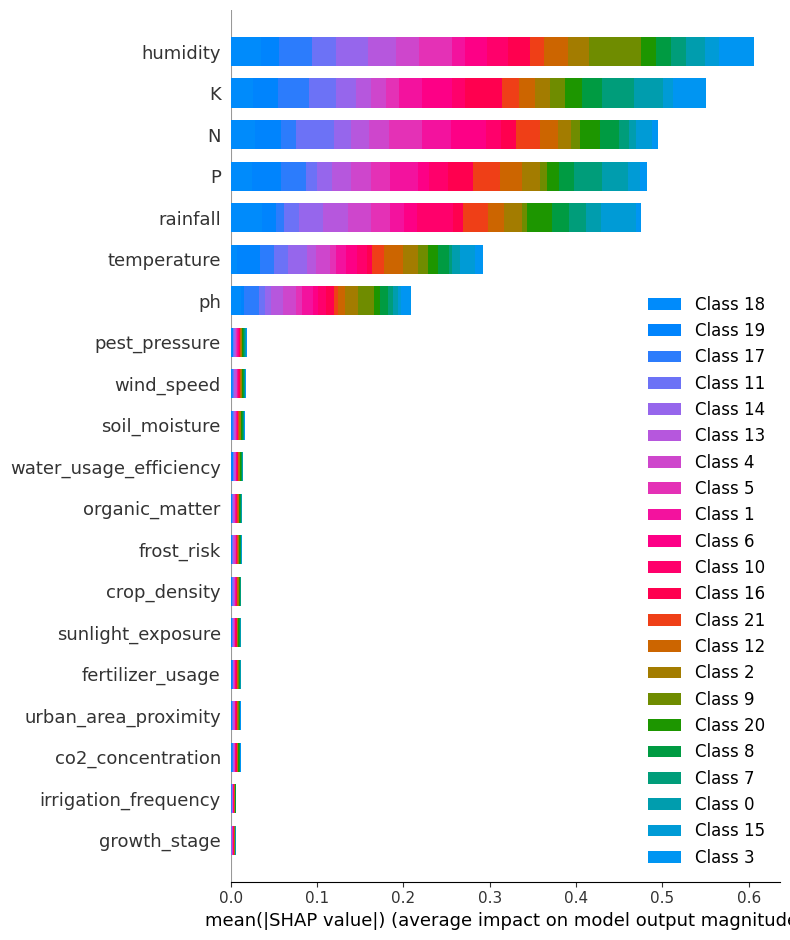

<Figure size 640x480 with 0 Axes>

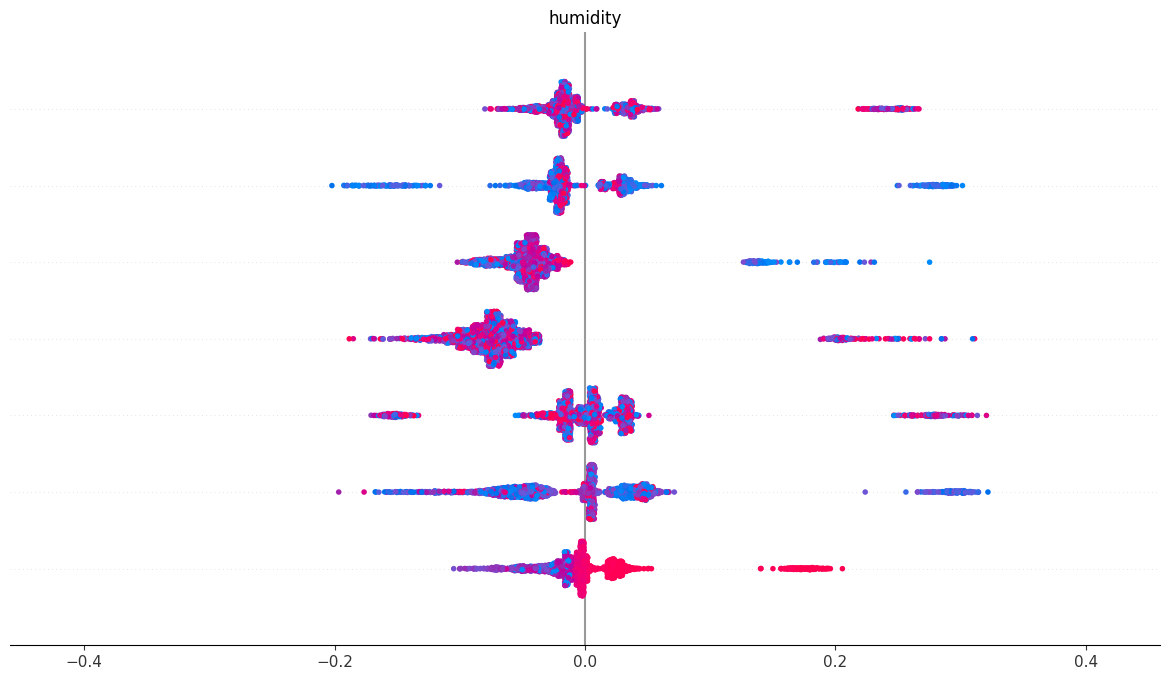

In [10]:
import shap

# Create SHAP explainer (for tree-based model)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

# Global feature importance (simple bar chart)
shap.summary_plot(shap_values, X, plot_type="bar")

# OR: Beeswarm plot (more detailed, shows value effects)
shap.summary_plot(shap_values, X)



# 🧮 3. Correlation with Target (Quick Check)

In [11]:
# Keep only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Now compute correlation with the encoded label
correlation = numeric_df.corr()['label_enc'].drop('label_enc').abs().sort_values(ascending=False)

print("📊 Correlation of features with target (label):")
print(correlation)



📊 Correlation of features with target (label):
P                         0.491006
K                         0.346417
humidity                  0.193911
temperature               0.113606
co2_concentration         0.062013
rainfall                  0.045611
N                         0.031130
frost_risk                0.030538
organic_matter            0.028224
urban_area_proximity      0.025207
crop_density              0.023190
soil_moisture             0.023052
sunlight_exposure         0.020551
irrigation_frequency      0.018761
soil_type                 0.018042
growth_stage              0.017631
water_usage_efficiency    0.016618
ph                        0.012253
wind_speed                0.011625
fertilizer_usage          0.009668
water_source_type         0.005560
pest_pressure             0.004103
Name: label_enc, dtype: float64


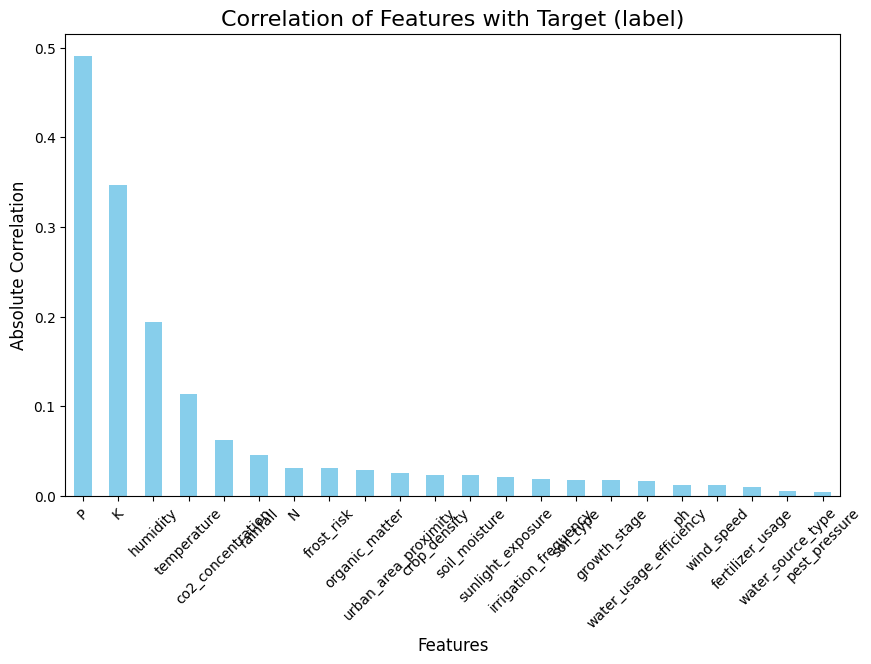

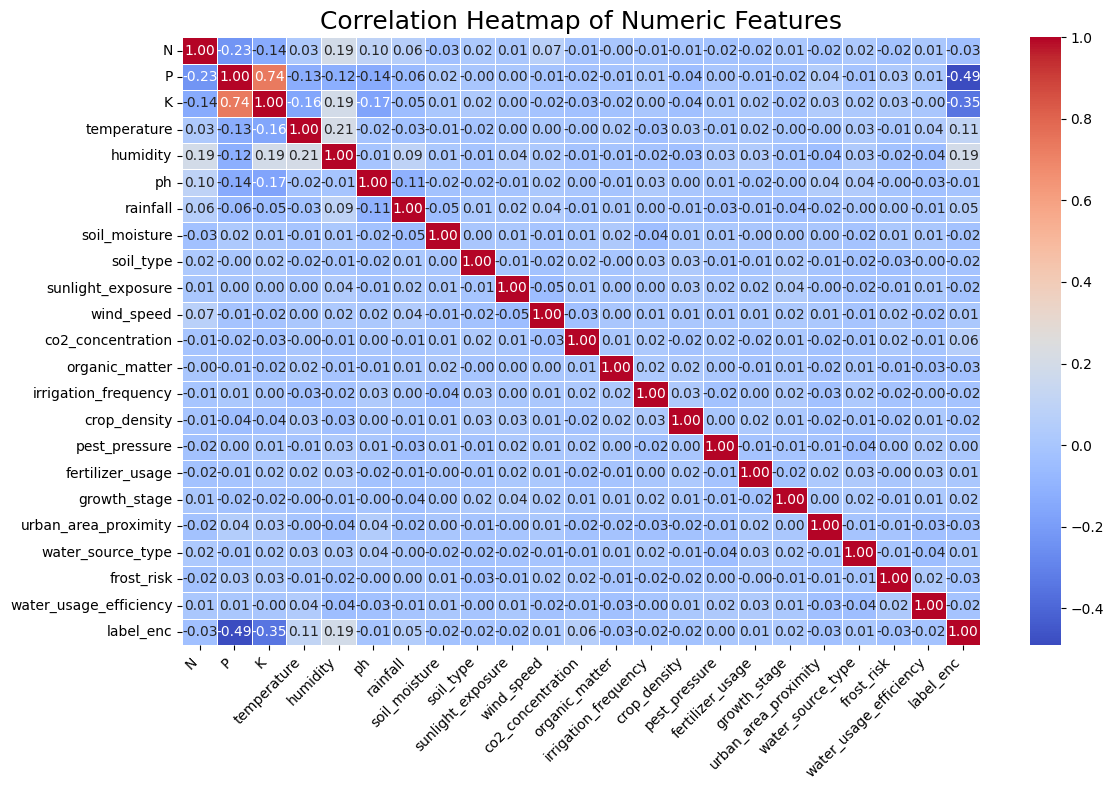

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the correlation using a bar chart
plt.figure(figsize=(10, 6))
bars=correlation.plot(kind='bar', color='skyblue')
plt.title('Correlation of Features with Target (label)', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Absolute Correlation', fontsize=12)
plt.xticks(rotation=45)

plt.show()

print ()
# Adjusted Heatmap: Increase figure size, adjust text size, and rotate labels
plt.figure(figsize=(12, 8))  # Larger figure size
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, annot_kws={'size': 10})
plt.title('Correlation Heatmap of Numeric Features', fontsize=18)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)  # Keep y-axis labels horizontal
plt.tight_layout()  # Ensures everything fits in the figure
plt.show()


#  4. PCA / Dimensionality Reduction (Unsupervised Insight)

In [8]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(X)
pca = PCA(n_components=5)
pca.fit(X_scaled)

pd.DataFrame(pca.components_, columns=X.columns).T


,0,1,2,3,4
N,-0.302965,0.325879,0.194610,0.104270,0.013239
P,0.638620,0.041605,0.071787,-0.001865,-0.050702
K,0.616640,0.283538,0.090385,0.002521,-0.100838
temperature,-0.211427,0.320633,-0.206117,-0.316916,-0.197040
humidity,-0.070227,0.711325,0.010542,-0.103664,-0.152956
ph,-0.221905,-0.199783,0.416117,-0.185619,-0.245029
rainfall,-0.075741,0.283508,-0.099956,0.445852,0.437919
soil_moisture,0.037825,-0.040428,-0.199379,-0.292580,-0.058342
soil_type,0.012830,-0.015185,-0.139872,0.362697,-0.166162
sunlight_exposure,0.002096,0.069739,-0.301439,0.041549,-0.282412


from matplotlib import pyplot as plt
_df_0[0].plot(kind='hist', bins=20, title=0)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1[1].plot(kind='hist', bins=20, title=1)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2[2].plot(kind='hist', bins=20, title=2)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3[3].plot(kind='hist', bins=20, title=3)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x=0, y=1, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x=1, y=2, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x=2, y=3, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x=3, y=4, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8[0].plot(kind='line', figsize=(8, 4), title=0)
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9[1].plot(kind='line', figsize=(8, 4), title=1)
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10[2].plot(kind='line', figsize=(8, 4), title=2)
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11[3].plot(kind='line', figsize=(8, 4), title=3)
plt.gca().spines[['top', 'right']].set_visible(False)

# 🔬 5. Mutual Information

In [9]:
from sklearn.feature_selection import mutual_info_classif

mi = mutual_info_classif(X, y)
mi_series = pd.Series(mi, index=X.columns).sort_values(ascending=False)
print(mi_series)


humidity                  1.729954
K                         1.658357
rainfall                  1.637358
P                         1.299245
temperature               1.017901
N                         0.979899
ph                        0.686067
pest_pressure             0.030213
organic_matter            0.027283
urban_area_proximity      0.023260
water_source_type         0.016443
irrigation_frequency      0.013268
sunlight_exposure         0.010537
soil_moisture             0.005258
crop_density              0.001520
wind_speed                0.000000
soil_type                 0.000000
co2_concentration         0.000000
growth_stage              0.000000
fertilizer_usage          0.000000
frost_risk                0.000000
water_usage_efficiency    0.000000
dtype: float64
